# $T_0 - T(t) = R_0 e^{- \lambda t}$
# $\lambda = \dfrac{ln2}{10}$

- ### $T_0 - T(t) = R(t)$: Remaining useful line (RUL)
- ### $t$: nhiệt độ hiện thời

# Let $\tau = e^{-\lambda t}$, then ..

# $T_0 - T(\tau) = R(\tau) = R_0 \tau$

# $T(\tau) = T_0 - R_0 \tau$

# Thus, if we have sample set of $(T_i, \tau_i)$, we can find $R_0$ and $T_0$ by the simple linear regression method:

# $R_0 = - \dfrac{\sum (T_i - \bar{T_i})( \tau_i - \bar{\tau_i}) }{\sum (\tau_i - \bar{\tau})^2 }$
# $T_0 = \bar{T_i} + R_0 \bar{\tau_i}$

In [1]:
import pandas as pd
import math
import numpy as np
import plotly.express as px

#df = pd.read_csv("HT_TI_2186A.PV.csv")
#df = pd.read_csv("HT_TI_2186C.PV.csv")
df = pd.read_csv("HT_TI_2186E.PV.csv")

In [2]:
Lambda =  math.log(2) / 10 
Lambda

0.06931471805599453

In [3]:
df['time'] = pd.to_datetime(df.time)
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

df1 = df[['temperature', 'year', 'month', 'day']]
#df1 = df1[ (df1.temperature > 60) & (df1.year == 2017) ]
df1 = df1[ (df1.temperature > 60) ]
#df1 = df1.groupby(['year', 'month', 'day']).mean()
df1 = df1.groupby(['year']).mean()
df1.reset_index(inplace=True)
df1['tau'] = np.exp( -Lambda * (df1['temperature'] - 60))
df1

,year,temperature,month,day,tau
0,2017,65.752249,8.685129,14.364673,0.671182
1,2018,63.487263,7.417159,15.388859,0.785277
2,2019,63.691045,5.935754,15.478147,0.774263
3,2020,65.315423,6.339422,15.751913,0.691815
4,2021,62.816761,7.200441,15.747366,0.822635
5,2022,63.422990,5.152707,15.104581,0.788783
6,2023,64.169928,4.153469,14.866139,0.748984


In [4]:
#df1['Time'] = pd.to_datetime(df1[['year', 'month', 'day']])
#df1['Torigin'] = pd.to_datetime('2010-01-01')
#df1['Time'] = df1.Time - df1.Torigin
#df1['Time'] = df1.Time.dt.days/365

df1['Time'] = df1.year
df1

,year,temperature,month,day,tau,Time
0,2017,65.752249,8.685129,14.364673,0.671182,2017
1,2018,63.487263,7.417159,15.388859,0.785277,2018
2,2019,63.691045,5.935754,15.478147,0.774263,2019
3,2020,65.315423,6.339422,15.751913,0.691815,2020
4,2021,62.816761,7.200441,15.747366,0.822635,2021
5,2022,63.422990,5.152707,15.104581,0.788783,2022
6,2023,64.169928,4.153469,14.866139,0.748984,2023


In [7]:
T_mean = df1.Time.mean()
tau_mean = df1.tau.mean()
(T_mean, tau_mean)
ts = ((df1.Time - T_mean) * (df1.tau - tau_mean)).sum()
ms = ((df1.tau - tau_mean)**2).sum()
R_0 = - ts/ms
R_0
T_0 = T_mean + R_0 * tau_mean
print(R_0, T_0)
model = np.polyfit(df1.tau, df1.Time, 1)
model

-15.993355099752321 2007.9297264586412


array([  15.9933551 , 2007.92972646])

In [8]:
df1['RUL'] = R_0 * df1.tau
df1

,year,temperature,month,day,tau,Time,RUL
0,2017,65.752249,8.685129,14.364673,0.671182,2017,-10.734446
1,2018,63.487263,7.417159,15.388859,0.785277,2018,-12.559215
2,2019,63.691045,5.935754,15.478147,0.774263,2019,-12.383062
3,2020,65.315423,6.339422,15.751913,0.691815,2020,-11.064439
4,2021,62.816761,7.200441,15.747366,0.822635,2021,-13.156689
5,2022,63.422990,5.152707,15.104581,0.788783,2022,-12.615293
6,2023,64.169928,4.153469,14.866139,0.748984,2023,-11.978771


------------------------------------

### $y = a \times b^x$
### $ln(y) = ln(a) + xln(b)$

### $A = regression(ln(a))$
### $B = regression(ln(b))$

### $ln(L) = A + temp \times B$
### $L = e^{A + temp \times B}$

In [1]:
import pandas as pd
import math
import numpy as np

#df = pd.read_csv("HT_TI_2186A.PV.csv")
#df = pd.read_csv("HT_TI_2186C.PV.csv")
df = pd.read_csv("HT_TI_2186E.PV.csv")

In [7]:
df['time'] = pd.to_datetime(df.time)
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

df1 = df[['temperature', 'time']]
df1 = df1[ (df1.temperature > 60) ]
df1['time1'] = (df1.time - pd.to_datetime('2017-01-01')).dt.days
df1

,temperature,time,time1
0,61.178613,2017-06-06 00:05:00,156
1,61.138004,2017-06-06 00:15:00,156
2,61.277757,2017-06-06 00:25:00,156
3,61.296651,2017-06-06 00:35:00,156
4,61.429301,2017-06-06 00:45:00,156
...,...,...,...
48623,61.484407,2023-06-22 06:00:00,2363
48624,61.140919,2023-06-22 07:00:00,2363
48625,60.797430,2023-06-22 08:00:00,2363
48626,60.453942,2023-06-22 09:00:00,2363


In [3]:
model = np.polyfit(df1.temperature, np.log(df1.time1), 1)
model

array([-3.55065184e-03,  7.10851945e+00])

In [6]:
B = model[0]
A = model[1]
temp = 190.9
L = math.exp(A + temp * B)
L

620.6082295973488

-----------------------------

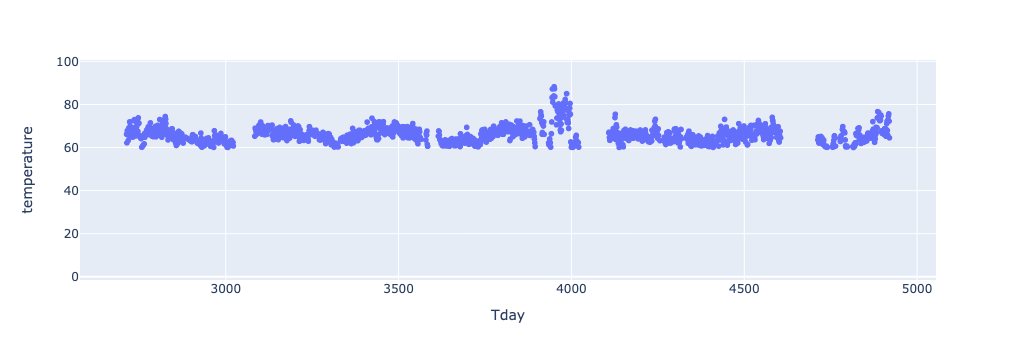

In [33]:
px.scatter(df1, x='Tday', y='temperature')

In [40]:
#df = df[df['temperature'] > 60]
df['time'] = pd.to_datetime(df.time)
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
#df.set_index("_time")
#df.rolling('1m').average()

In [41]:
dfMean = df[['year','temperature']].groupby('year').mean()
dfMean.reset_index(inplace=True)
#px.line(dfMean, x='year', y='temperature', range_y=[0, 100])

In [42]:
dfMean['eTemp'] = np.exp( - FACTOR * dfMean['temperature'] )
dfMean

,year,temperature,eTemp
0,2017,63.962912,0.011872
1,2018,64.092703,0.011766
2,2019,64.318590,0.011583
3,2020,65.897784,0.010382
4,2021,63.324790,0.012409
5,2022,63.930150,0.011899
6,2023,64.816346,0.011190


In [43]:
dfMean['eTemp_s1'] = dfMean.eTemp.shift(1)
dfMean

,year,temperature,eTemp,eTemp_s1
0,2017,63.962912,0.011872,NaN
1,2018,64.092703,0.011766,0.011872
2,2019,64.318590,0.011583,0.011766
3,2020,65.897784,0.010382,0.011583
4,2021,63.324790,0.012409,0.010382
5,2022,63.930150,0.011899,0.012409
6,2023,64.816346,0.011190,0.011899


In [44]:
dfMean['R_0'] = -1 / (dfMean['eTemp'] - dfMean['eTemp_s1'])
dfMean

,year,temperature,eTemp,eTemp_s1,R_0
0,2017,63.962912,0.011872,NaN,NaN
1,2018,64.092703,0.011766,0.011872,9404.947346
2,2019,64.318590,0.011583,0.011766,5470.925412
3,2020,65.897784,0.010382,0.011583,832.672222
4,2021,63.324790,0.012409,0.010382,-493.348512
5,2022,63.930150,0.011899,0.012409,1961.129007
6,2023,64.816346,0.011190,0.011899,1410.602038


In [45]:
R_0=dfMean.R_0.mean()
R_0

3097.8212522225876

In [46]:
df["RUL"] = R_0 * df["factor"]
df

,id,time,temperature,factor,year,month,RUL
0,81,2017-06-06 00:05:00,61.675388,0.013912,2017,6,43.096518
1,81,2017-06-06 00:15:00,62.149883,0.013462,2017,6,41.702151
2,81,2017-06-06 00:25:00,62.319251,0.013305,2017,6,41.215444
3,81,2017-06-06 00:35:00,62.164987,0.013448,2017,6,41.658515
4,81,2017-06-06 00:45:00,62.244340,0.013374,2017,6,41.430009
...,...,...,...,...,...,...,...
48625,81,2023-06-22 08:00:00,61.706976,0.013881,2023,6,43.002259
48626,81,2023-06-22 09:00:00,61.358349,0.014221,2023,6,44.054065
48627,81,2023-06-22 10:00:00,61.009722,0.014569,2023,6,45.131598
48628,81,2023-06-22 11:00:00,60.661095,0.014925,2023,6,46.235486
